### Importing Python libraries

In [149]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


### Loading the Fashion MNIST Dataset 

In [150]:
fashion_mnist_dataset = keras.datasets.fashion_mnist
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist_dataset.load_data()

print("Shape: ", X_train_full.shape,"Type: ", X_train_full.dtype)
print("Shape: ",y_train_full.shape,"Type: ", y_train_full.dtype)
print("Shape: ",X_test.shape,"Type: ", X_test.dtype)
print("Shape: ",y_test.shape,"Type: ", y_test.dtype)

Shape:  (60000, 28, 28) Type:  uint8
Shape:  (60000,) Type:  uint8
Shape:  (10000, 28, 28) Type:  uint8
Shape:  (10000,) Type:  uint8


### Splitting Data into validation, training and testing sets

In [151]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [152]:
print (y_train) #number of classes 
print (X_train[0])

[4 0 7 ... 3 0 5]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.17254902
  0.49803922 0.71372549 0.7254902  0.63137255 0.47058824 0.21568627
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.16470588 0.77647059 0.98431373
  1.         0.98431373 0.97647059 0.96862745 1.         0.98823529
  0.83921569 0.39215686 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.         0.   

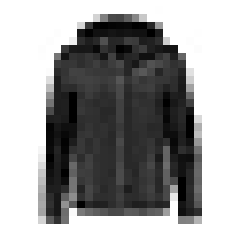

In [153]:
plt.imshow(X_train[0], cmap = "binary")
plt.axis("off")
plt.show()

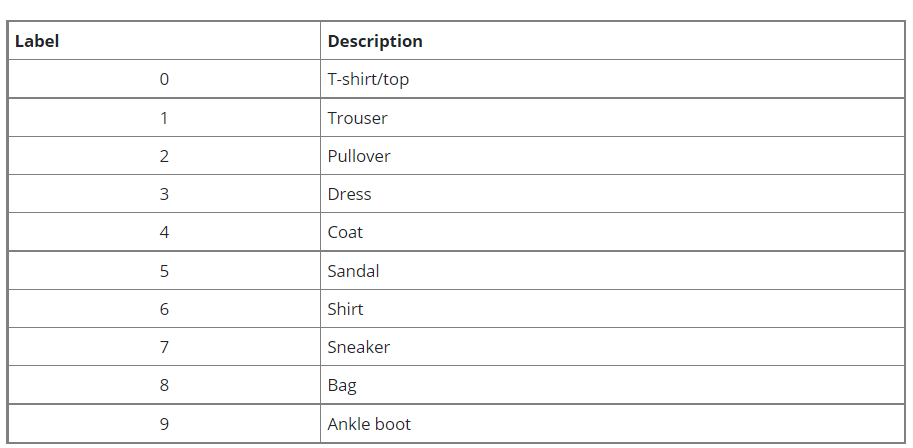

In [154]:
#as per the given data
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

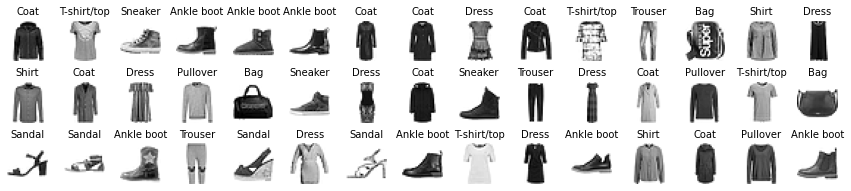

In [155]:
#first 45 products in X_train
n_rows = 3
n_cols = 15
plt.figure(figsize=(n_cols * 1.0, n_rows * 1.0))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating a model Using Sequential API

In [156]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) # reshaping it into 1D array
model.add(keras.layers.Dense(300, activation = "relu"))#hidden layer with 300 neurons with relu activation
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation = "relu")) #hidden layer with 100 neurons with relu activation
model.add(keras.layers.Dense(10, activation = "softmax")) #output layer with 10 clasess with softmax activation


In [157]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 267,810
Trainable params: 267,210
Non-trainable params: 600
_________________________________________________________________


In [158]:
hidden1 = model.layers[1]
print(hidden1.name)
weights,biases = hidden1.get_weights()
print(weights.shape, biases.shape)
print (weights)
print(biases)

dense_3
(784, 300) (300,)
[[ 0.03209214  0.01646119  0.07279907 ...  0.05532882  0.0651055
   0.01338679]
 [-0.07043175 -0.06354109 -0.03279725 ...  0.0738048   0.06112438
  -0.067646  ]
 [-0.0390753  -0.03905331 -0.05842574 ... -0.03778124 -0.05413332
  -0.05784603]
 ...
 [-0.06908896 -0.03583148 -0.0127943  ...  0.03302018  0.0715531
   0.06026185]
 [-0.02363452  0.06483786  0.06673828 ... -0.04533065 -0.02517227
   0.01567771]
 [ 0.00329755 -0.04633755  0.02964893 ... -0.06003758 -0.06951307
  -0.01986539]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [159]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01)

In [160]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [161]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")
print(os.path)
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()
print(run_logdir)

<module 'ntpath' from 'c:\\users\\mistr\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'>
.\my_logs\run_2021_07_29-15_40_54


In [162]:
checkpoint_nn = keras.callbacks.ModelCheckpoint("my_fashion_model.h5", save_best_only=True)
early_stopping_nn = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_nn = keras.callbacks.TensorBoard( log_dir = run_logdir, histogram_freq=1)

In [163]:
history = model.fit(X_train, y_train, epochs=100, validation_data = (X_valid,  y_valid), callbacks=[checkpoint_nn, early_stopping_nn, tensorboard_nn])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5287 - accuracy: 0.8165 - val_loss: 0.4017 - val_accuracy: 0.8568
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3883 - accuracy: 0.8611 - val_loss: 0.3602 - val_accuracy: 0.8710
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3510 - accuracy: 0.8738 - val_loss: 0.3520 - val_accuracy: 0.8734
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3255 - accuracy: 0.8827 - val_loss: 0.3317 - val_accuracy: 0.8808
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3081 - accuracy: 0.8887 - val_loss: 0.3168 - val_accuracy: 0.8860
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2943 - accuracy: 0.8915 - val_loss: 0.3217 - val_accuracy: 0.8860
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2782 - accuracy: 0.8989 - val_loss: 0.3208 - val_ac

In [172]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --host localhost

Reusing TensorBoard on port 6006 (pid 12356), started 11 days, 6:04:10 ago. (Use '!kill 12356' to kill it.)

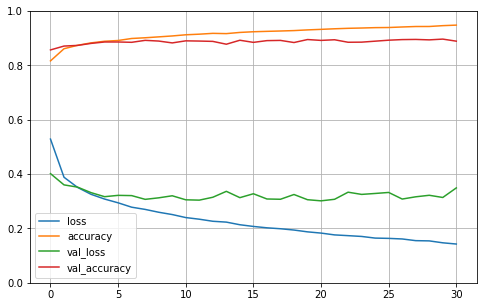

In [165]:
pd.DataFrame(history.history).plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [166]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 82.5610 - accuracy: 0.7713


[82.56098937988281, 0.7713000178337097]

In [167]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print (y_proba.round(2))

y_pred = model.predict_classes(X_new)
y_pred



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([9, 2, 1], dtype=int64)

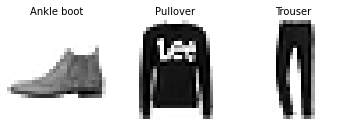

In [168]:
for col in range(X_new.shape[0]):
    plt.subplot(1, X_new.shape[0], col + 1) #rows, columns and index
    plt.imshow(X_new[col], cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[col]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

### Upload any image from your device

In [169]:
import ipywidgets as widgets
from IPython import display
import IPython
import PIL.Image
import io
x = widgets.FileUpload(
    multiple=False  # True to accept multiple files upload else False
)

x

FileUpload(value={}, description='Upload')

In [173]:
# print (next(iter(x.value)))
# print(x.value)

(1, 784)

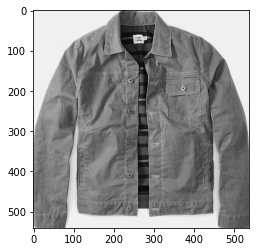

In [179]:
from PIL import Image
import cv2
import base64

# Take in base64 string and return cv image
def stringToRGB(base64_string):
    image = Image.open(io.BytesIO(base64_string))

    return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)


base64_string = x.value[next(iter(x.value))]["content"]

test_img = stringToRGB(base64_string)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
test_img = cv2.resize(test_img, (28, 28))
test_img = test_img/255.0
test_img.resize(1, 784)
test_img.shape

In [180]:
y_proba_test = model.predict([test_img])
y_proba_test
print (y_proba_test.round(2))

y_pred = model.predict_classes(test_img)
y_pred



[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


array([8], dtype=int64)